In [1]:
import sys
import os
import matplotlib.pyplot as plt
import csv

In [2]:
main_file = "./src/main.cpp"
command_base = "g++ -o main -MMD -MP -O3 -march=native -ffast-math {} ./src/main.cpp && ./main {}"

output_file = 'part2a.csv'


In [3]:
def get_timers(raw, query):
    lines = [line[6:].strip().split(",") for line in raw.split("\n") if line.startswith("TIMER:")]
    lines = {line[0]: float(line[2]) for line in lines}
    return lines.get(query, -1)
    
def work(nlist, describtion, macro):
    res = list()
    for n in nlist:
        command = command_base.format(macro, n)
        raw = os.popen(command).read()

        timer = get_timers(raw, 'PA')
        with open(output_file, 'a', encoding='UTF8') as f:
            writer = csv.writer(f, delimiter=';')
            writer.writerow([n, int(timer), describtion])

        res.append(timer)
    return res
        


# Plot ABS Value

In [6]:
def plot_abs(nlist, data):
    fig, ax = plt.subplots(figsize=(10,8))
    for name, ys in data.items():
        Linewidths=[2, 2, 2]

        xs = [str(n) for n in nlist]

        ax.set_title(r"Cycles", loc="left", fontsize=20,pad=16)

        ax.set_facecolor("lavender")
        for b in ax.get_ygridlines():
            b.set_color('white')
            b.set_linewidth(2)
        ax.tick_params(axis='both', top=False, bottom=True, left=False, right=False, direction='out', which='both', labelsize=14,pad=8)

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.grid(True, axis="y")
        ax.set_xlabel(r'n')
        ax.spines['bottom'].set_linewidth(2)
        ax.xaxis.set_tick_params(width=2)

        ax.plot(xs, ys, linewidth=Linewidths[0], label=name)

        ax.legend(fontsize="large")

    fig.tight_layout()

# Plot Speedup

In [7]:
def plot_speedup(nlist, data, baseline_key):
    fig, ax = plt.subplots(figsize=(10,8))
    for name, ys in data.items():
        Linewidths=[2, 2, 2]
        
        ys = [data[baseline_key][i] / ys[i] for i in range(len(nlist))]
        xs = [str(n) for n in nlist]

        ax.set_title(r"Speedup", loc="left", fontsize=20,pad=16)

        ax.set_facecolor("lavender")
        for b in ax.get_ygridlines():
            b.set_color('white')
            b.set_linewidth(2)
        ax.tick_params(axis='both', top=False, bottom=True, left=False, right=False, direction='out', which='both', labelsize=14,pad=8)

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.grid(True, axis="y")
        ax.set_xlabel(r'n')
        ax.spines['bottom'].set_linewidth(2)
        ax.xaxis.set_tick_params(width=2)

        ax.plot(xs, ys, linewidth=Linewidths[0], label=name)

        ax.legend(fontsize="large")

    fig.tight_layout()

nvec-avx2 is running...
nvec-scalar is running...
nvec-base is running...
vec-avx2 is running...
vec-scalar is running...
vec-base is running...


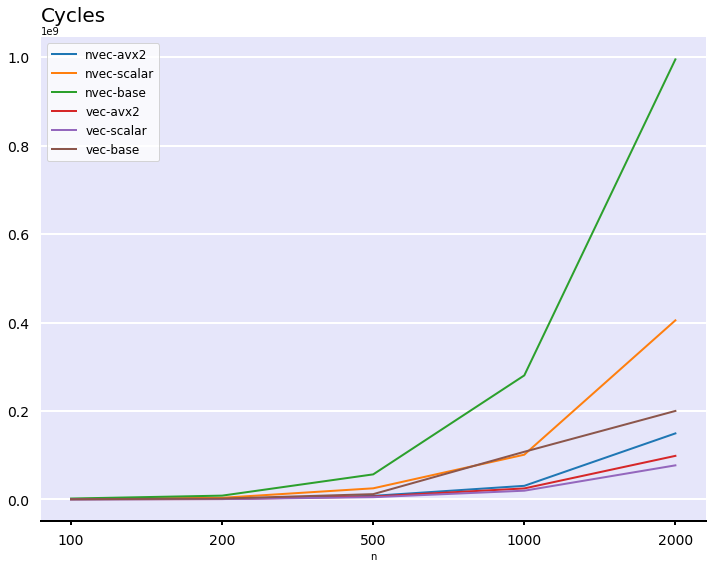

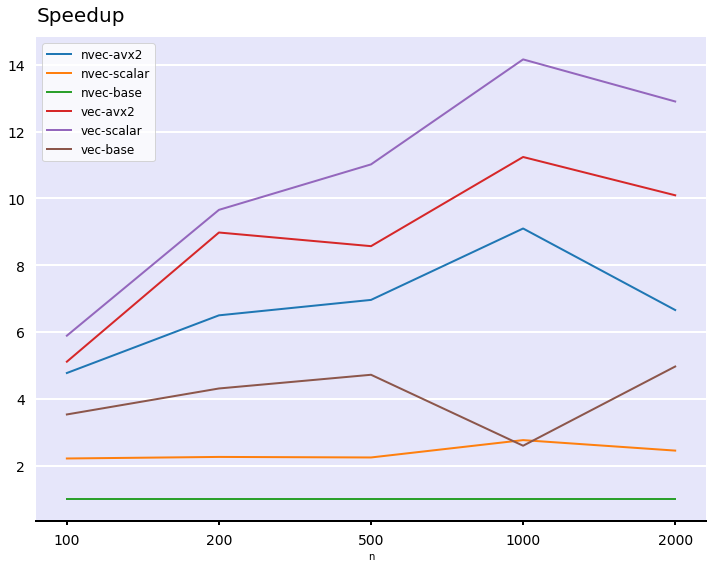

In [8]:
def main():
    flags = {
    'nvec': '-O3 -fno-tree-vectorize',
    'vec': '-O3'
    }
    macros = {
        'avx2': '-DV_SCALAR -DSYM_AFF_PA_AVX2',
        'scalar': '-DV_SCALAR -DSYM_AFF_PA_SCALAR_UP1',
        'base': '-DV_BASELINE'
    }
    nlist = [100, 200, 500]
    
    data = {}
    for kf, vf in flags.items():
        for km, vm in macros.items():
            key = kf + '-' + km
            print(key, "is running...")
            data[key] = work(nlist, vf, vm, "PA")
            
    plot_abs(nlist, data)
    plot_speedup(nlist, data, 'nvec-base')

main()

baseline is running...
[687978447.0, 2561317894.0, 9397482900.0]
optimized_dist is running...
[529845514.0, 1407153314.0, 8586563806.0]
optimized_dist_enr16 is running...
[518012790.0, 1379998627.0, 8986068955.0]
scalar_opt is running...
[780559263.0, 2047105737.0, 10636569277.0]


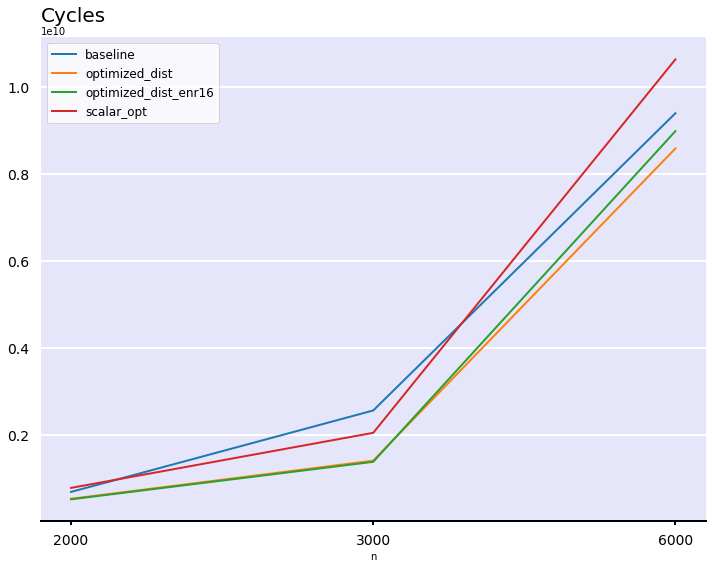

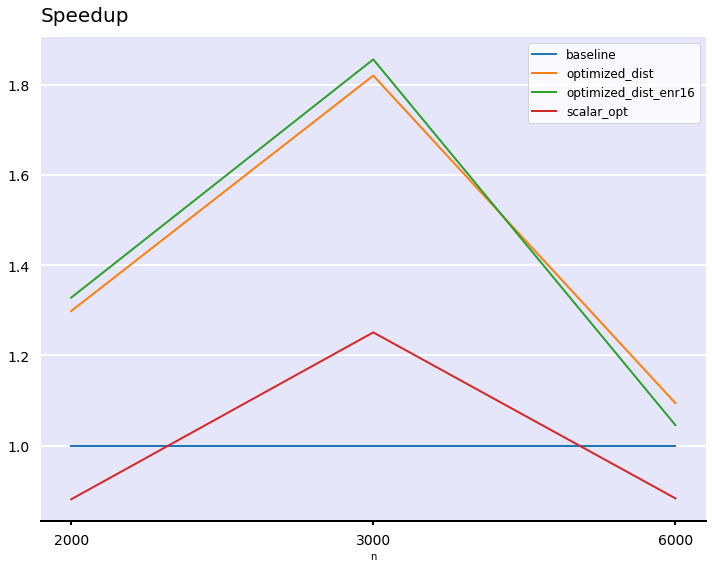

In [10]:
# Euclidian distances
def main():
    macros = {
        'baseline': '-DV_BASELINE',
        'optimized_dist': '-DV_SCALAR -DSQEU_DIST_OPT_ENR8',
        'optimized_dist_enr16': '-DV_SCALAR -DSQEU_DIST_OPT_ENR16',
        'scalar_opt': '-DV_SCALAR -DSQEU_DIST_ENR8'
    }
    #nlist = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    nlist = [2000, 3000, 6000]
    
    data = {}
    for km, vm in macros.items():
        key = km
        print(key, "is running...")
        output = work(nlist, km, vm)
        print(output)
        data[key] = output
            
    plot_abs(nlist, data)
    plot_speedup(nlist, data, 'baseline')

main()

scalar_init is running...
[1119048209.0, 2091829550.0, 2695119345.0]
scalar_up1 is running...
[1093103724.0, 1611086258.0, 2261961857.0]
scalar_up4 is running...
[1051147378.0, 1592389963.0, 2415847406.0]
scalar_up5 is running...
[1330302209.0, 2295443086.0, 2679522362.0]
base is running...
[2205419134.0, 3555290264.0, 5407912175.0]


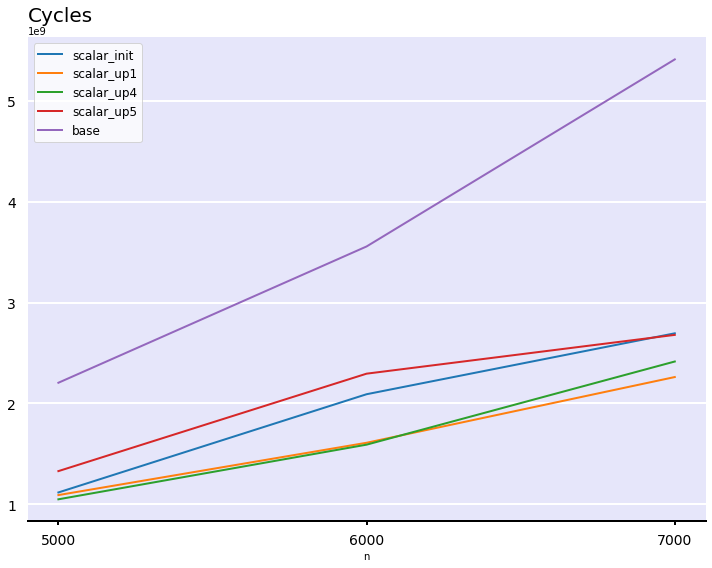

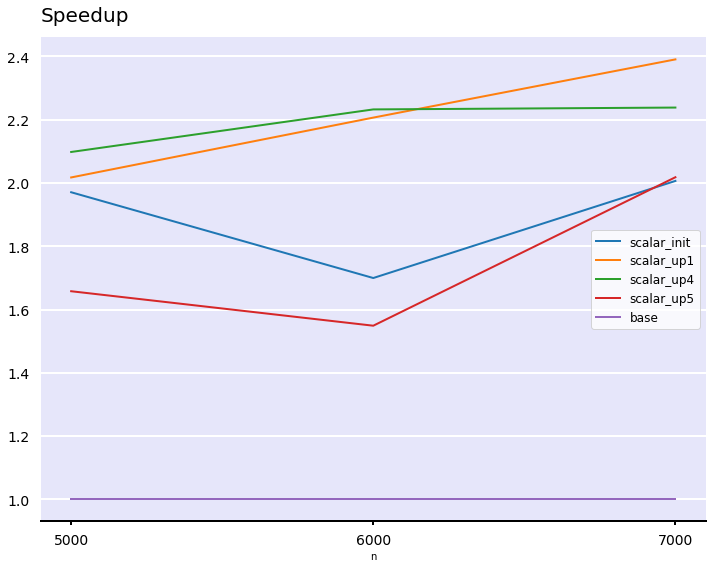

In [13]:
# Pairwise affinities
def main():
    macros = {
        'scalar_init': '-DV_SCALAR -DSQEU_DIST_ENR8 -DSYM_AFF_SCALAR -DSYM_AFF_PA_SCALAR_INIT',
        'scalar_up1': '-DV_SCALAR -DSQEU_DIST_ENR8 -DSYM_AFF_SCALAR -DSYM_AFF_PA_SCALAR_UP1',
        'scalar_up3': '-DV_SCALAR -DSQEU_DIST_ENR8 -DSYM_AFF_SCALAR -DSYM_AFF_PA_SCALAR_UP3',
        'base': '-DV_BASELINE'
    }
    #nlist = [100, 200, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    nlist = [5000, 6000, 7000]
    
    data = {}
    for km, vm in macros.items():
        key = km
        print(key, "is running...")
        output = work(nlist, km, vm)
        print(output)
        data[key] = output
            
    plot_abs(nlist, data)
    plot_speedup(nlist, data, 'base')

main()

scalar_init is running...
[395856.0, 1224450.0, 7007187.0, 9704033.0, 12708459.0, 23395027.0, 26104253.0, 26977497.0, 105799821.0, 232778788.0, 422262694.0, 647458696.0, 978321312.0, 1348261636.0, 1810086741.0, 2439073665.0, 2819432562.0]
scalar_up1 is running...
[513301.0, 1664603.0, 6353744.0, 10881724.0, 11889919.0, 17673780.0, 19980390.0, 22587642.0, 89405648.0, 220696991.0, 360961830.0, 567422473.0, 806472931.0, 1116666599.0, 1519372685.0, 1820584016.0, 2611266864.0]
scalar_up4 is running...
[488880.0, 1199088.0, 6576461.0, 8815772.0, 11296551.0, 14866002.0, 19366245.0, 23109417.0, 92497100.0, 189444448.0, 338645049.0, 548564490.0, 796000435.0, 1090850996.0, 1461259541.0, 1941134587.0, 2403962976.0]


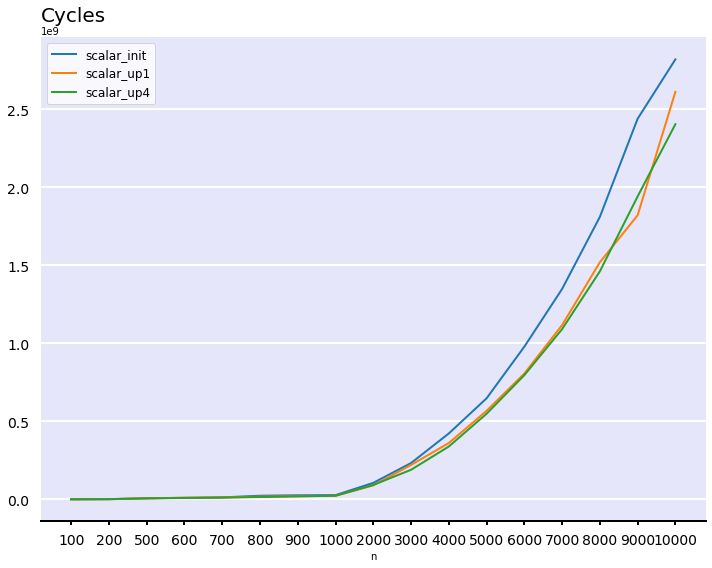

In [9]:
def main():
    macros = {
        'scalar_init': '-DV_SCALAR -DSQEU_DIST_ENR8 -DSYM_AFF_SCALAR -DSYM_AFF_PA_SCALAR_INIT',
        'scalar_up1': '-DV_SCALAR -DSQEU_DIST_ENR8 -DSYM_AFF_SCALAR -DSYM_AFF_PA_SCALAR_UP1',
        'scalar_up4': '-DV_SCALAR -DSQEU_DIST_ENR8 -DSYM_AFF_SCALAR -DSYM_AFF_PA_SCALAR_UP4',
    }
    nlist = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    #nlist = [5000, 6000, 7000]
    
    data = {}
    for km, vm in macros.items():
        key = km
        print(key, "is running...")
        output = work(nlist, km, vm)
        print(output)
        data[key] = output
            
    plot_abs(nlist, data)

main()